Step:1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

Step:2

In [2]:
iris = load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  #0 = setosa,1 = versicolor,2 =virginica
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


 step 3: exploratory Data Analysis

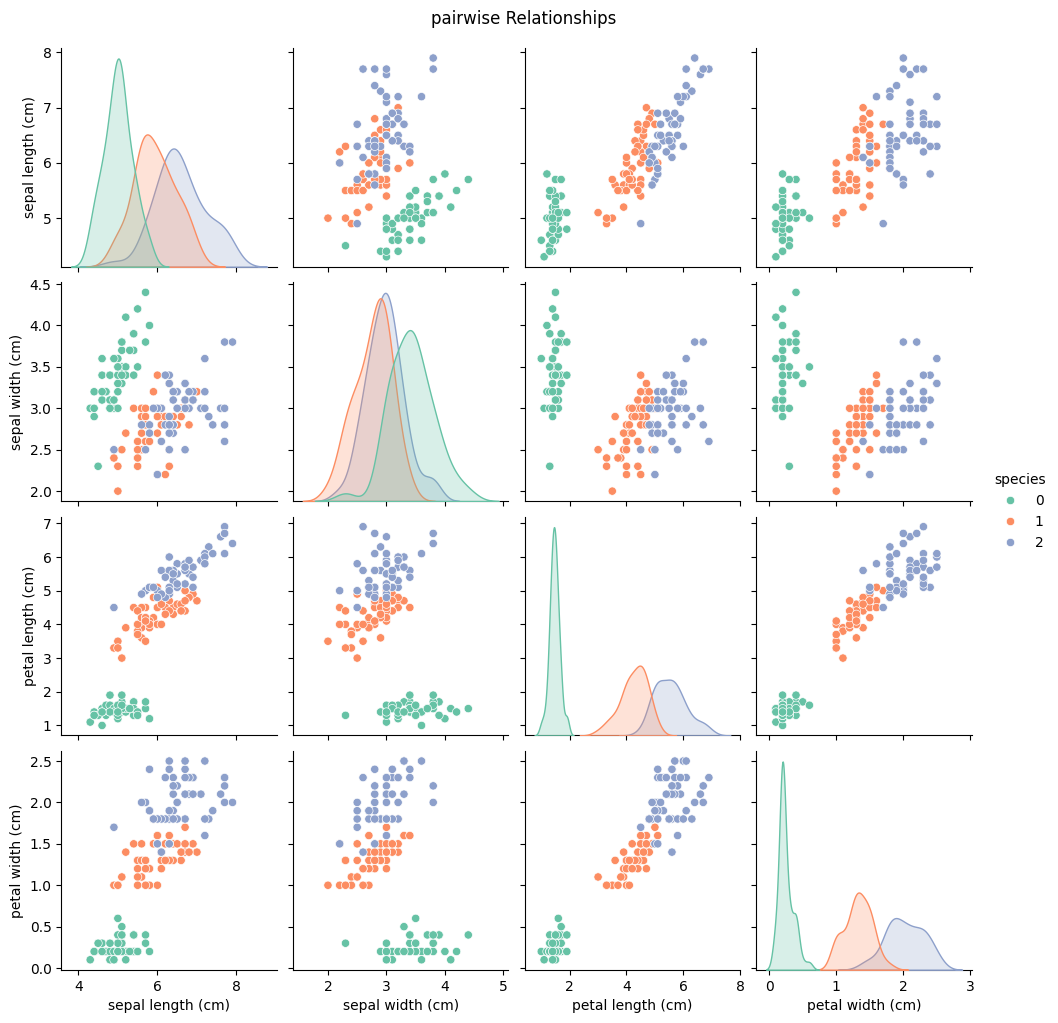

In [4]:
sns.pairplot(df, hue='species', palette='Set2')
plt.suptitle("pairwise Relationships", y=1.02)
plt.show()

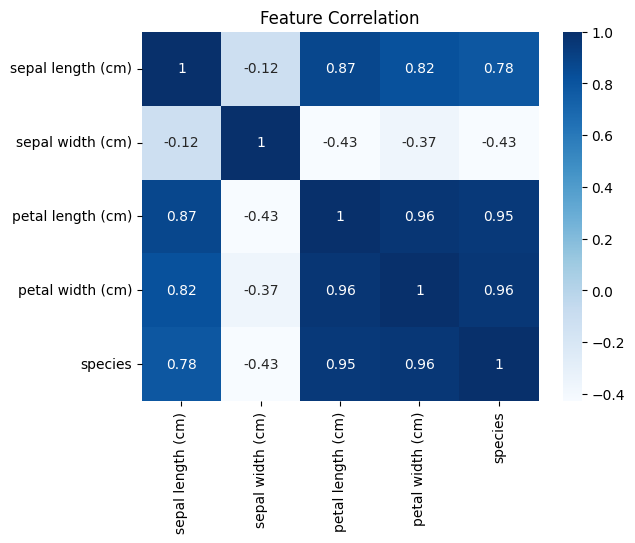

In [5]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation")
plt.show()

Step 4: Data Splitting

In [6]:
x = df.drop('species', axis=1)
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

Step 5: Train Models (KNN and Decision Tree)

In [8]:
#knn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn_preds = knn.predict(x_test)

In [9]:
#Decision Tree
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_preds = tree.predict(x_test)

Step 6: Evaluate Models

In [10]:
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))

KNN Accuracy: 1.0
Decision Tree Accuracy: 1.0


Step:6

To Check If the Model Is Overfitting or If the Data is Too Easy Option 1 Try a different train-test split OPTION 2 Try using cross-validation

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
model = KNeighborsClassifier(n_neighbors=3)

# Perform 5-fold cross-validation
scores = cross_val_score(model, x, y, cv=5)

# Print results
print("Fold-wise Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())


Fold-wise Accuracy Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Average Accuracy: 0.9666666666666668


 using cross-validation Evaluation

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier()

# Perform 5-fold cross-validation
tree_scores = cross_val_score(tree_model, x, y, cv=5)

# Print results
print("Decision Tree - Fold-wise Accuracy Scores:", tree_scores)
print("Decision Tree - Average Accuracy:", tree_scores.mean())


Decision Tree - Fold-wise Accuracy Scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Decision Tree - Average Accuracy: 0.9666666666666668
